# Supplementary Material -- Figure S1, S4, and S5
### Wave gradient mechanisms

This notebook has the code necessary to reproduce Figures S1, S4, and S5 in *Villas Bôas, Marechal, and A Bohé, (2025)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

In [2]:
path_out = '../figures/' # path, where to save the figure?
file_out_GS = 'S01_GS.png' # figure name?
file_out_CCS = 'S04_CCS.png' # figure name?
file_out_TC = 'S05_TC.png' # figure name?

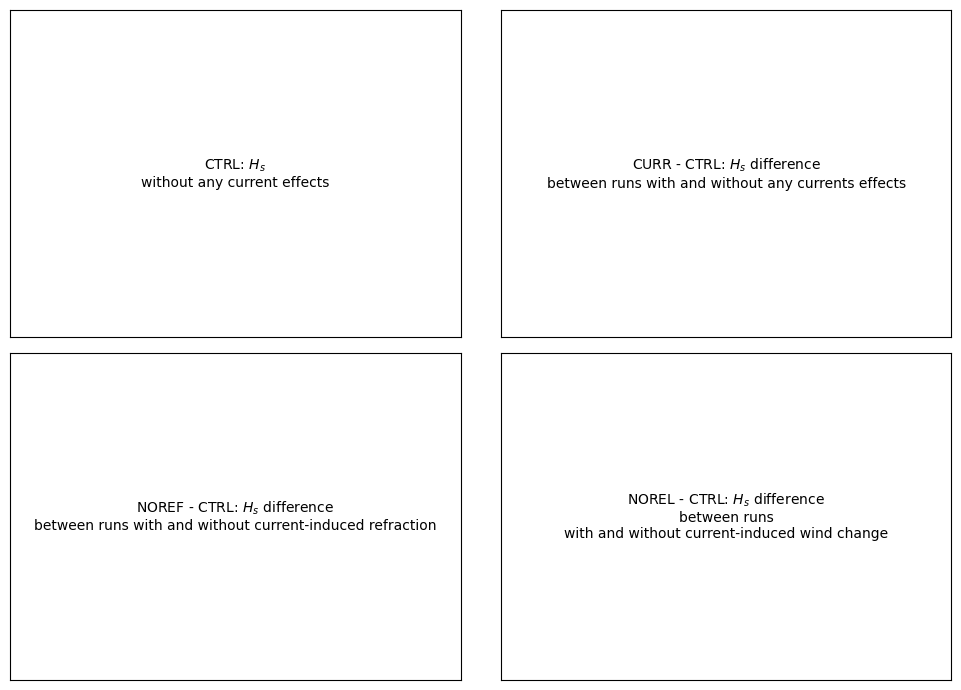

In [3]:
fig = plt.figure(figsize=(10, 7))

gs = GridSpec(2, 2, figure=fig)

# Add four subplots and annotate each with text
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Add text
ax1.text(0.5, 0.5, 'CTRL: $H_{s}$\nwithout any current effects', fontsize=10, ha='center', va='center')
ax2.text(0.5, 0.5, 'CURR - CTRL: $H_{s}$ difference\nbetween runs with and without any currents effects', fontsize=10, ha='center', va='center')
ax3.text(0.5, 0.5, 'NOREF - CTRL: $H_{s}$ difference\nbetween runs with and without current-induced refraction', fontsize=10, ha='center', va='center')
ax4.text(0.5, 0.5, 'NOREL - CTRL: $H_{s}$ difference\nbetween runs\nwith and without current-induced wind change', fontsize=10, ha='center', va='center')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.show()

### Load data

In [4]:
path_SI = '../data/WW3/SI/'

###########
# --- GS
###########

ds_GS_CTRL = xr.open_dataset(path_SI + 'GS_CTRL.nc')
ds_GS_HYCOM = xr.open_dataset(path_SI + 'GS_HYCOM.nc')
ds_GS_NOREF = xr.open_dataset(path_SI + 'GS_HYCOM_no_ref.nc')
ds_GS_NORELWND = xr.open_dataset(path_SI + 'GS_no_relwind.nc')

###########
# --- CCS
###########

ds_CCS_CTRL = xr.open_dataset(path_SI + 'CCS_CTRL.nc')
ds_CCS_HYCOM = xr.open_dataset(path_SI + 'CCS_HYCOM.nc')
ds_CCS_NOREF = xr.open_dataset(path_SI + 'CCS_HYCOM_no_ref.nc')
ds_CCS_NORELWND = xr.open_dataset(path_SI + 'CCS_no_relwind.nc')

###########
# --- TC
###########

ds_TC_CTRL = xr.open_dataset(path_SI + 'TC_CTRL.nc')
ds_TC_HYCOM = xr.open_dataset(path_SI + 'TC_HYCOM.nc')
ds_TC_NOREF = xr.open_dataset(path_SI + 'TC_HYCOM_no_ref.nc')
ds_TC_NORELWND = xr.open_dataset(path_SI + 'TC_HYCOM_no_relwind.nc')


In [5]:
diff_curr = ds_GS_HYCOM.hs - ds_GS_CTRL.hs
diff_ref = ds_GS_NOREF.hs - ds_GS_CTRL.hs
diff_rel_wind = ds_GS_NORELWND.hs - ds_GS_CTRL.hs

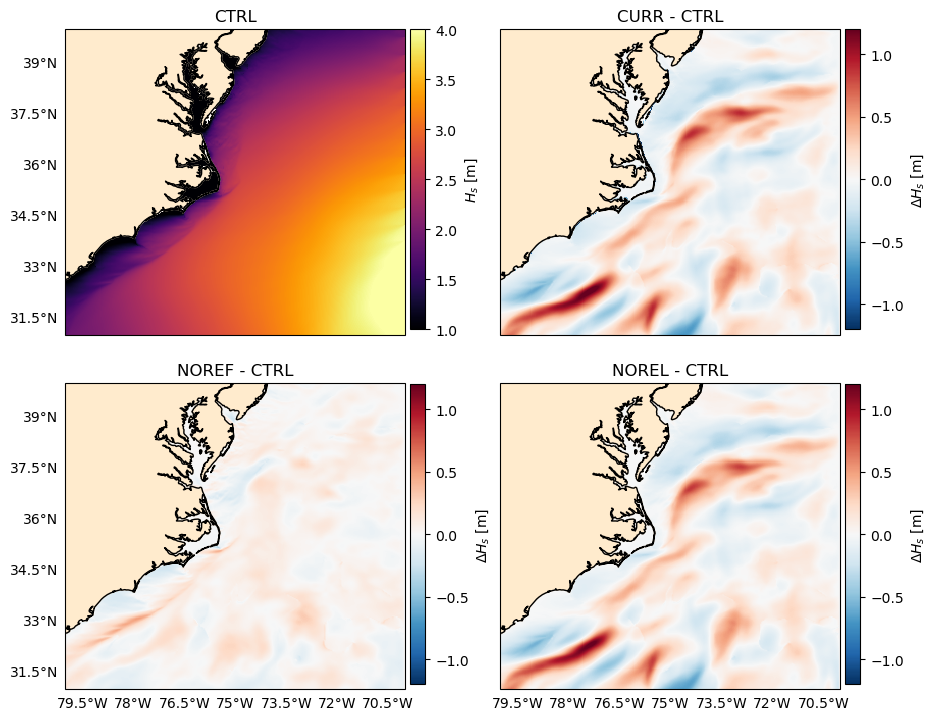

In [6]:
lon_min, lon_max, lat_min, lat_max = -80, -70, 31, 40

fig = plt.figure(figsize = (10, 10))

##########
# --- Cartopy axes
##########
####################################################################################################
# --- CTRL
####################################################################################################
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)


# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = True
gl.bottom_labels = False
gl.top_labels = False
p1 = plt.pcolormesh(ds_GS_HYCOM.longitude, ds_GS_CTRL.latitude, ds_GS_CTRL.hs, vmin = 1, vmax = 4, cmap = 'inferno')
ax.set_title('CTRL')
cax = fig.add_axes([.47, 0.525, 0.015, .3])
cbar = plt.colorbar(p1, cax = cax)

cbar.ax.set_ylabel('$H_{s}$ [m]')

####################################################################################################
# --- HYCOM
####################################################################################################
ax = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)


# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = False
gl.bottom_labels = False
gl.top_labels = False
p2 = plt.pcolormesh(ds_GS_HYCOM.longitude, ds_GS_HYCOM.latitude, diff_curr, vmin = -1.2, vmax = 1.2, cmap = 'RdBu_r')
ax.set_title('CURR - CTRL')
cax = fig.add_axes([.905, 0.525, 0.015, .3])
cbar = plt.colorbar(p2, cax = cax)
cbar.ax.set_ylabel('$\\Delta H_{s}$ [m]')
####################################################################################################
# --- NO REF DIFF
####################################################################################################
ax = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)



# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = True
gl.bottom_labels = True
gl.top_labels = False
p3 = plt.pcolormesh(ds_GS_HYCOM.longitude, ds_GS_HYCOM.latitude, diff_ref, vmin = -1.2, vmax = 1.2, cmap = 'RdBu_r')
ax.set_title('NOREF - CTRL')
cax = fig.add_axes([.47, 0.17, 0.015, .3])
cbar = plt.colorbar(p3, cax = cax)
cbar.ax.set_ylabel('$\\Delta H_{s}$ [m]')
####################################################################################################
# --- NO REL WIND DIFF
####################################################################################################
ax = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)


# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = False
gl.bottom_labels = True
gl.top_labels = False
p4 = plt.pcolormesh(ds_GS_HYCOM.longitude, ds_GS_HYCOM.latitude, diff_rel_wind, vmin = -1.2, vmax = 1.2, cmap = 'RdBu_r')
ax.set_title('NOREL - CTRL')
cax = fig.add_axes([.905, 0.17, 0.015, .3])
cbar = plt.colorbar(p4, cax = cax)
cbar.ax.set_ylabel('$\\Delta H_{s}$ [m]')
plt.subplots_adjust(wspace= .28, hspace=-.15)
plt.savefig(path_out + file_out_GS, dpi = 300, bbox_inches = 'tight')



In [7]:
diff_curr = ds_CCS_HYCOM.hs - ds_CCS_CTRL.hs
diff_ref = ds_CCS_NOREF.hs - ds_CCS_CTRL.hs
diff_rel_wind = ds_CCS_NORELWND.hs - ds_CCS_CTRL.hs

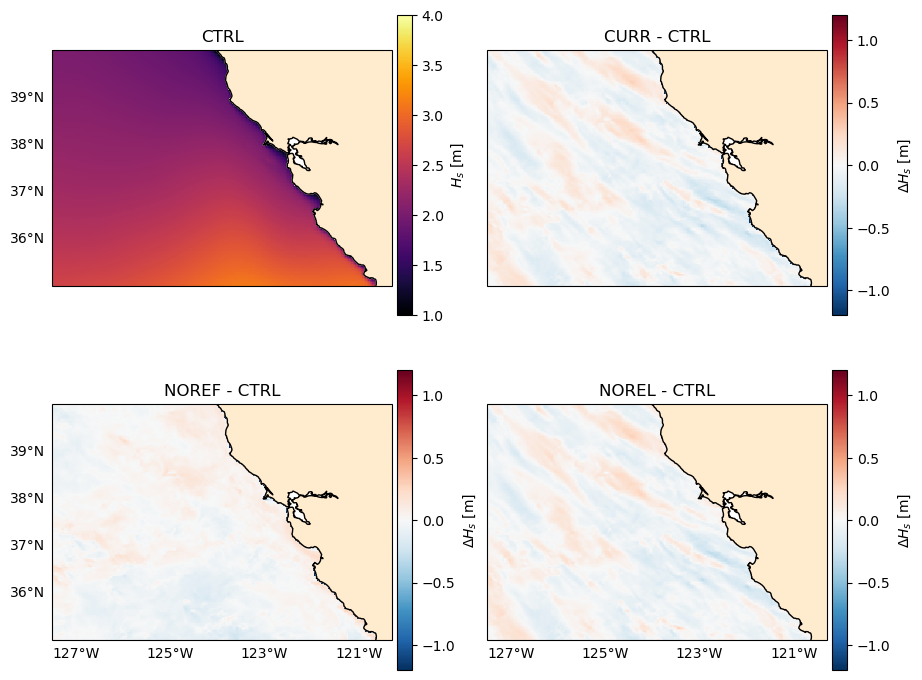

In [8]:
lon_min, lon_max, lat_min, lat_max = -127.5, -120.3, 35, 40

fig = plt.figure(figsize = (10, 10))

##########
# --- Cartopy axes
##########
####################################################################################################
# --- CTRL
####################################################################################################
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)



# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = True
gl.bottom_labels = False
gl.top_labels = False
p1 = plt.pcolormesh(ds_CCS_HYCOM.longitude, ds_CCS_HYCOM.latitude, ds_CCS_CTRL.hs, vmin = 1, vmax = 4, cmap = 'inferno')
ax.set_title('CTRL')
cax = fig.add_axes([.47, 0.525, 0.015, .3])
cbar = plt.colorbar(p1, cax = cax)

cbar.ax.set_ylabel('$H_{s}$ [m]')

####################################################################################################
# --- HYCOM
####################################################################################################
ax = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)



# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = False
gl.bottom_labels = False
gl.top_labels = False
p2 = plt.pcolormesh(ds_CCS_HYCOM.longitude, ds_CCS_HYCOM.latitude, diff_curr, vmin = -1.2, vmax = 1.2, cmap = 'RdBu_r')
ax.set_title('CURR - CTRL')
cax = fig.add_axes([.905, 0.525, 0.015, .3])
cbar = plt.colorbar(p2, cax = cax)
cbar.ax.set_ylabel('$\\Delta H_{s}$ [m]')
####################################################################################################
# --- NO REF DIFF
####################################################################################################
ax = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)


# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = True
gl.bottom_labels = True
gl.top_labels = False
p3 = plt.pcolormesh(ds_CCS_HYCOM.longitude, ds_CCS_HYCOM.latitude, diff_ref, vmin = -1.2, vmax = 1.2, cmap = 'RdBu_r')
ax.set_title('NOREF - CTRL')
cax = fig.add_axes([.47, 0.17, 0.015, .3])
cbar = plt.colorbar(p3, cax = cax)
cbar.ax.set_ylabel('$\\Delta H_{s}$ [m]')
####################################################################################################
# --- NO REL WIND DIFF
####################################################################################################
ax = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)


# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = False
gl.bottom_labels = True
gl.top_labels = False
p4 = plt.pcolormesh(ds_CCS_HYCOM.longitude, ds_CCS_HYCOM.latitude, diff_rel_wind, vmin = -1.2, vmax = 1.2, cmap = 'RdBu_r')
ax.set_title('NOREL - CTRL')
cax = fig.add_axes([.905, 0.17, 0.015, .3])
cbar = plt.colorbar(p4, cax = cax)
cbar.ax.set_ylabel('$\\Delta H_{s}$ [m]')
plt.subplots_adjust(wspace= .28, hspace=-.15)
plt.savefig(path_out + file_out_CCS, dpi = 300, bbox_inches = 'tight')


In [9]:
diff_curr = ds_TC_HYCOM.hs - ds_TC_CTRL.hs
diff_ref = ds_TC_NOREF.hs - ds_TC_CTRL.hs
diff_rel_wind = ds_TC_NORELWND.hs - ds_TC_CTRL.hs

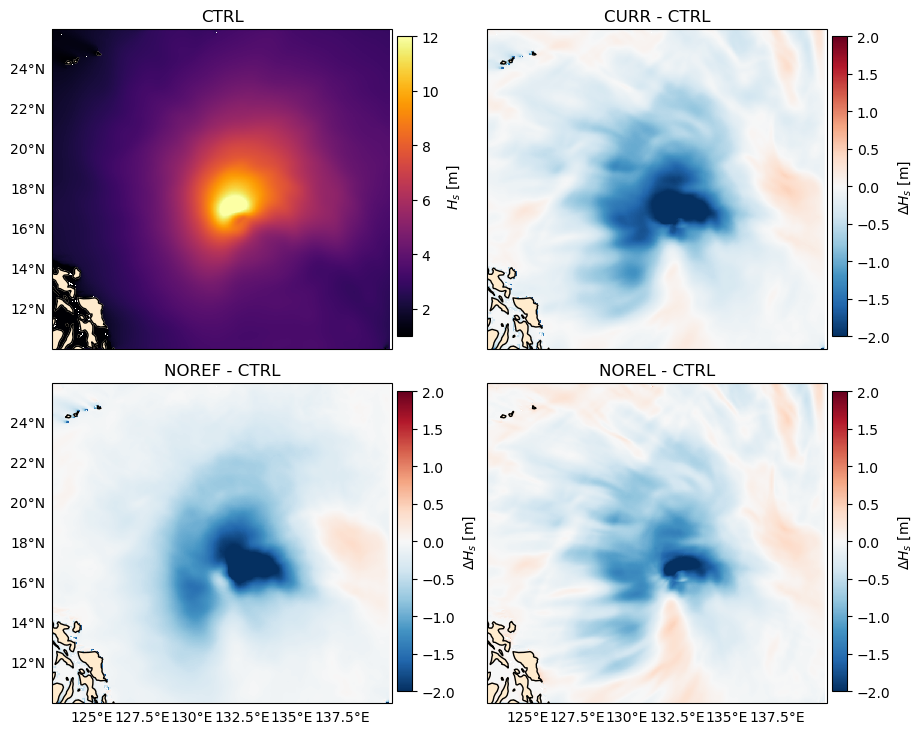

In [10]:
lon_min, lon_max, lat_min, lat_max = 123, 140, 10, 26

fig = plt.figure(figsize = (10, 10))

##########
# --- Cartopy axes
##########
####################################################################################################
# --- CTRL
####################################################################################################
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)



# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = True
gl.bottom_labels = False
gl.top_labels = False
p1 = plt.pcolormesh(ds_TC_CTRL.longitude, ds_TC_CTRL.latitude, ds_TC_CTRL.hs, vmin = 1, vmax = 12, cmap = 'inferno')
ax.set_title('CTRL')
cax = fig.add_axes([.47, 0.525, 0.015, .3])
cbar = plt.colorbar(p1, cax = cax)

cbar.ax.set_ylabel('$H_{s}$ [m]')

####################################################################################################
# --- HYCOM
####################################################################################################
ax = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)



# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = False
gl.bottom_labels = False
gl.top_labels = False
p2 = plt.pcolormesh(ds_TC_CTRL.longitude, ds_TC_CTRL.latitude, diff_curr, vmin = -2, vmax = 2, cmap = 'RdBu_r')
ax.set_title('CURR - CTRL')
cax = fig.add_axes([.905, 0.525, 0.015, .3])
cbar = plt.colorbar(p2, cax = cax)
cbar.ax.set_ylabel('$\\Delta H_{s}$ [m]')
####################################################################################################
# --- NO REF DIFF
####################################################################################################
ax = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)


# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = True
gl.bottom_labels = True
gl.top_labels = False
p3 = plt.pcolormesh(ds_TC_CTRL.longitude, ds_TC_CTRL.latitude, diff_ref, vmin = -2, vmax = 2, cmap = 'RdBu_r')
ax.set_title('NOREF - CTRL')
cax = fig.add_axes([.47, 0.17, 0.015, .3])
cbar = plt.colorbar(p3, cax = cax)
cbar.ax.set_ylabel('$\\Delta H_{s}$ [m]')
####################################################################################################
# --- NO REL WIND DIFF
####################################################################################################
ax = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree()) 
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--', zorder=1)

# --- Add features
ax.add_feature(cfeature.LAND,zorder=2,color='blanchedalmond')
ax.add_feature(cfeature.COASTLINE, zorder = 4)


# --- Activate and deactivate labels

gl.right_labels =False
gl.left_labels = False
gl.bottom_labels = True
gl.top_labels = False
p4 = plt.pcolormesh(ds_TC_NOREF.longitude, ds_TC_NOREF.latitude, diff_rel_wind, vmin = -2, vmax = 2, cmap = 'RdBu_r')
ax.set_title('NOREL - CTRL')
cax = fig.add_axes([.905, 0.17, 0.015, .3])
cbar = plt.colorbar(p4, cax = cax)
cbar.ax.set_ylabel('$\\Delta H_{s}$ [m]')
plt.subplots_adjust(wspace= .28, hspace=-.15)
plt.savefig(path_out + file_out_TC, dpi = 300, bbox_inches = 'tight')
